### Lecture 6

When minimizing $f$, we wish to find a global minimizer, a value of $x$ for which $f(x)$ is minimized. A function may have at most one global minimum, but it may have multiple global minimizers.

> A univariate function is a function of a single scalar. The term univariate describes objects involving one variable.

**Local Minima**
A point $x_∗$ is at a **local minimum** (or is a local minimizer) if there exists
a $\delta$ > 0 such that $f(x_∗) \le f(x)$ for all $x$ with $|x − x_∗| < \delta$. 

In the multivariate
context, this definition generalizes to there being a $\delta > 0 $ such that $f(x_∗) \le f(x)$
whenever $||x − x_∗|| < \delta$.

**strong local minima and week local minima**
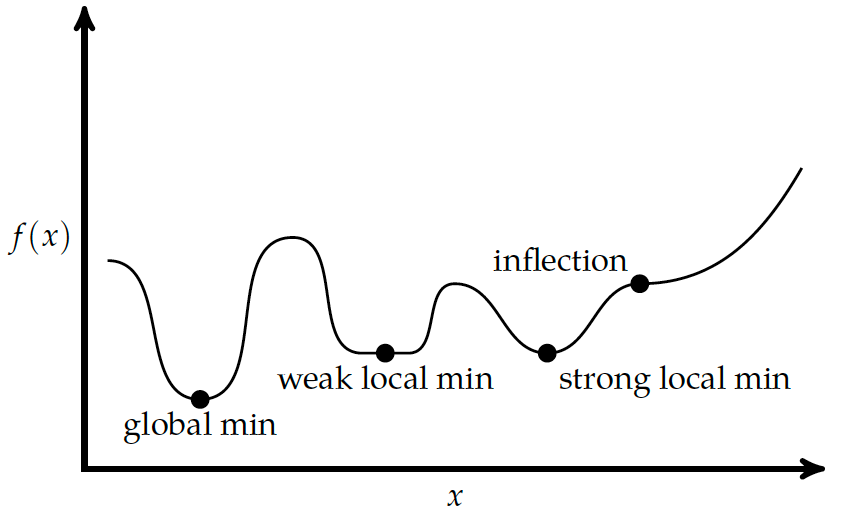

#### Conditions for local minima

##### Univariate

A design point is guaranteed to be at a strong local minimum if the local derivative is zero and the second derivative is positive:

+ $f'(x^*)=0$
+ $f''(x^*)>0$

The first necessary condition can be derived using the Taylor expansion about our candidate point $x^*$:
$$
\begin{split}
& f(x^∗ + h) = f(x^∗) + hf'(x^∗) +O(h^2) \\
& f(x^∗ - h) = f(x^∗) - hf'(x^∗) +O(h^2) \\
& f(x^∗ + h) \ge f(x^*) => hf'(x^*) \ge 0 \\
& f(x^∗ + h) \ge f(x^*) => hf'(x^*) \le 0 \\
& => f'(x^*)=0
\end{split}
$$

The second-order necessary condition can also be obtained from the Taylor
expansion:
$$
f(x^∗ + h) = f (x^∗) + hf'(x^∗) + \frac{h^2}{2}f''(x^∗) +O(h^3)
$$

We know that the first-order necessary condition must apply:

$$
f(x^∗ + h) \ge f(x^∗) => \frac{h^2}{2}f''(x^∗) \ge 0
$$

**1st order Taylor Expansion**
$$f(x): R^n -> R$$

$$
f(x^∗ + \rho) = f(x^∗) + \rho^T\nabla f(x^∗+w\rho) 
$$, 

where $\rho$ is a n-dimension vector and $0 \le w \le 1$.

$$
\nabla f(x) = g(x) = \begin{bmatrix} \partial f/\partial x_1 \\ \dots \\ \partial f/\partial x_n\end{bmatrix}
$$
**2nd order Taylor Expansion**
$$
f(x^∗ + \rho) = f(x^∗) + \rho^T g(x^*) + \frac{1}{2}\rho^T\nabla^2 f(x^∗+w\rho) 
$$, 
where $\rho$ is a n-dimension vector and $0 \le w \le 1$.

$$
H(x)=\begin{pmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{pmatrix}
$$

$H(x) = H(x)^T => H(x)$ is symmetric

**Ex2**
$$
f(x,y)=(y-x^2)(y-3x^2)=y^2-3x^2y-x^2y+3x^4
$$

$$
g(x,y)=\begin{bmatrix}-8xy+12x^3 \\ 2y-4x^2\end{bmatrix}

H(x,y)=\begin{bmatrix}-8y+2yx^2 & -8x \\ -6y-2x & 2 \end{bmatrix}
$$

#### Optimality Condition

**Necessary**:

+ univariate >multivariate: $f'(x)=0 -> g(x^*)=0$

+ univariate >multivariate: $f''(x)=0 -> H(x^*)$ is semi-definite

if $A$ is semi-definite, then all the eigenvalues of $A, \forall \lambda \ge 0$ 

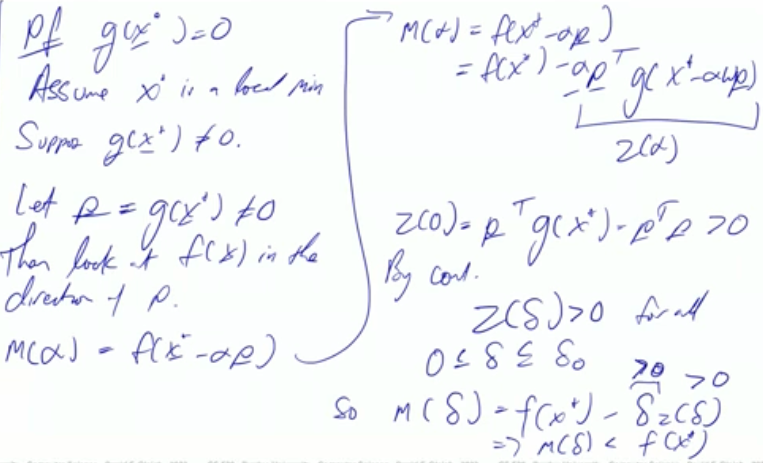

**Sufficient**:

+ univariate >multivariate: $f'(x)=0 -> g(x^*)=0$

+ univariate >multivariate: $f''(x)=0 -> H(x^*)$ is positive definite


In [7]:
using Plots, LinearAlgebra, Random, StatsBase
using Interact
gr()
import Pkg; Pkg.add("PyPlot")


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed PyPlot ─ v2.11.1
   Installed PyCall ─ v1.95.1
    Updating `~/.julia/environments/v1.8/Project.toml`
  [d330b81b] + PyPlot v2.11.1
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [438e738f] + PyCall v1.95.1
  [d330b81b] + PyPlot v2.11.1
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/62f417f6ad727987c755549e9cd88c46578da562/build.log`
Precompiling project...
  ✓ PyCall
  ✓ PyPlot
  2 dependencies successfully precompiled in 6 seconds. 188 already precompiled. 1 skipped during auto due to previous errors.


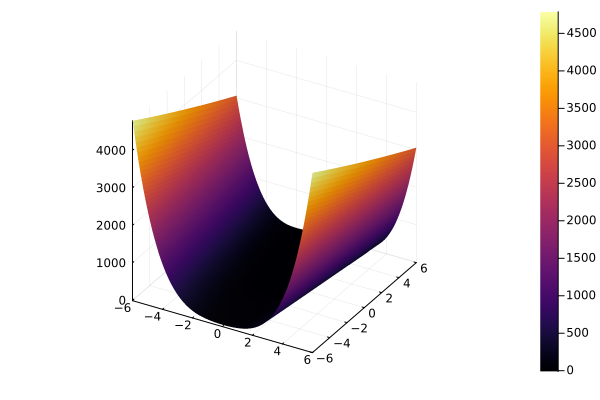

In [2]:
# Let's demonstrate a failure of optimality condition.
# Consider this function
f = (x, y) -> (y - x.^2).*(y - 3*x.^2)
# Create a meshgrid
x = -6:0.05:6
y = -6:0.05:6
X = repeat(x', length(y), 1)
Y = repeat(y, 1, length(x))
# Evaluate each f(x, y)
Z = map(f, X, Y)

surface(X, Y, Z)
#zlims!(0,50.0)

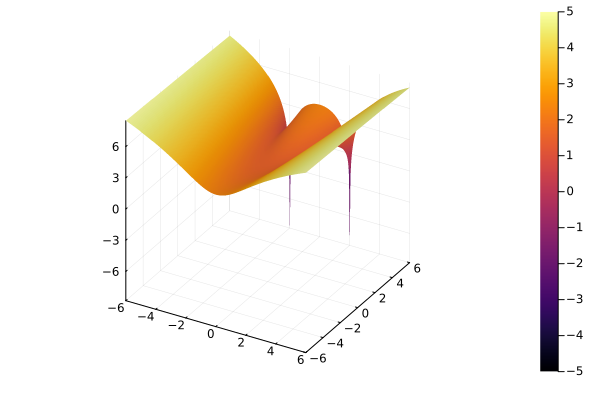

In [3]:
# Show the plot in log-space
gr()
plot(X, Y, log.(Z.-minimum(Z).+10000*sqrt(eps(1.0))), #.+ performs + element by element on arrays
seriestype=:surface, clims=(-5,5))

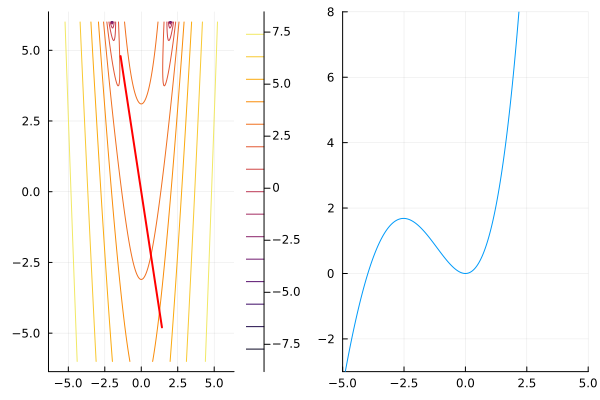

In [4]:
#t = 6*π
t = 5.0
zt = -5:5

ftheta = z -> f(z*cos(t), z*sin(t))

# create a layout
l = @layout [a{0.5w} b]
p = plot(x, y, log.(Z.-minimum(Z).+10000*sqrt(eps(1.0))),
    st=:contour, layout=l)

plot!(p[1], zt*cos(t), zt*sin(t), line=(:red, 2), label="")

z = -5:0.01:5
zf = map(ftheta, z)
plot!(p[2], z, zf, xaxis=[-5, 5], ylims=[-3, 8], label="")

In [5]:
gr()
@manipulate for θ = 0.0:(2*pi)/500:2.0*pi
    t = θ
    zt = -5:5
    ftheta = z -> f(z*cos(t), z*sin(t))
    z = -5.0:0.01:5.0
    zf = map(ftheta, z)
    plot(z, zf)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["θ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 501, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:at

In [8]:
pyplot()
@manipulate for θ = 0:(2*pi)/500:2*pi
    t = θ
    zt = -5:5

    ftheta = z -> f(z*cos(t), z*sin(t))

    # create a layout
    l = @layout [a{0.5w} b]
    p = plot(x, y, log.(Z.-minimum(Z).+10000*sqrt(eps(1.0))), st=:contour, layout=l)

    plot!(p[1], zt*cos(t), zt*sin(t), line=(:red, 2))

    z = -5:0.01:5
    zf = map(ftheta, z)
    plot!(p[2], z, zf, xaxis=[-5, 5], yaxis=[-0.5, 1.0])
    p
end

[ Info: Installing matplotlib via the Conda matplotlib package...
[ Info: Running `conda install -y matplotlib` in root environment


Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/zhaorunchen/.julia/conda/3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h1a8c8d9_8          19 KB  conda-forge
    brotli-bin-1.0.9           |       h1a8c8d9_8          18 KB  conda-forge
    contourpy-1.0.7            |  py310h2887b22_0         196 KB  conda-forge
    cycler-0.11.0              |     pyhd8ed1ab_0          10 KB  conda-forge
    fonttools-4.38.0           |  py310h8e9501a_1         1.9 MB  conda-forge
    freetype-2.12.1            |       hd633e50_1         559 KB  conda-forge
    jpeg-9e                    |       h1a8c8d9_3         213 KB  conda-forge
    kiwisolver-1.4.4           |  py310h2887b22_1          61 KB  conda-forge
    lcms2-2.14                 |       h481adae_1         200 KB  co

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["θ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 501, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:at

[ Info: Saved animation to /Users/zhaorunchen/Public/Purdue/Spring_2023/CS 520/Notes/optimality-1.gif


Plots.AnimatedGif("/Users/zhaorunchen/Public/Purdue/Spring_2023/CS 520/Notes/optimality-1.gif")
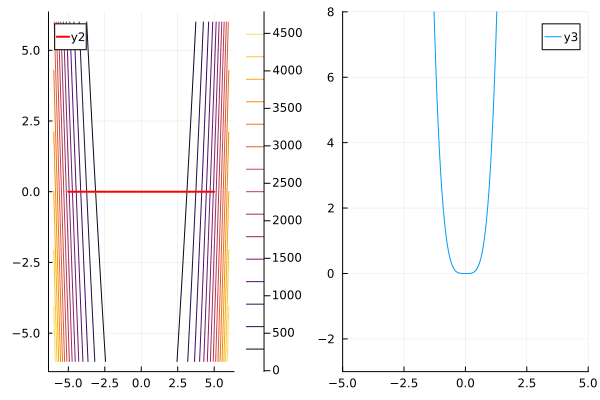

In [9]:
# What we'll do is observe that it has a local minimizer on any line thorugh
# the origin, but there is no minimizer there!
gr()
thetas = 0:0.01:2*pi

anim = @animate for ti = 1:length(thetas)
    # ti = 27 # enable this to get stepping behavior
    t = thetas[ti]
    zt = -5.0:5.0

    ftheta = z -> f(z*cos(t), z*sin(t))

    # create a layout
    l = @layout [a{0.5w} b]
    p = plot(x, y, Z, st=:contour, layout=l)

    plot!(p[1], zt*cos(t), zt*sin(t), line=(:red, 2))

    z = -5:0.01:5
    zf = map(ftheta, z)
    plot!(p[2], z, zf, xaxis=[-5, 5], yaxis=[-3, 8])
end
gif(anim, "./optimality-1.gif", fps = 10)